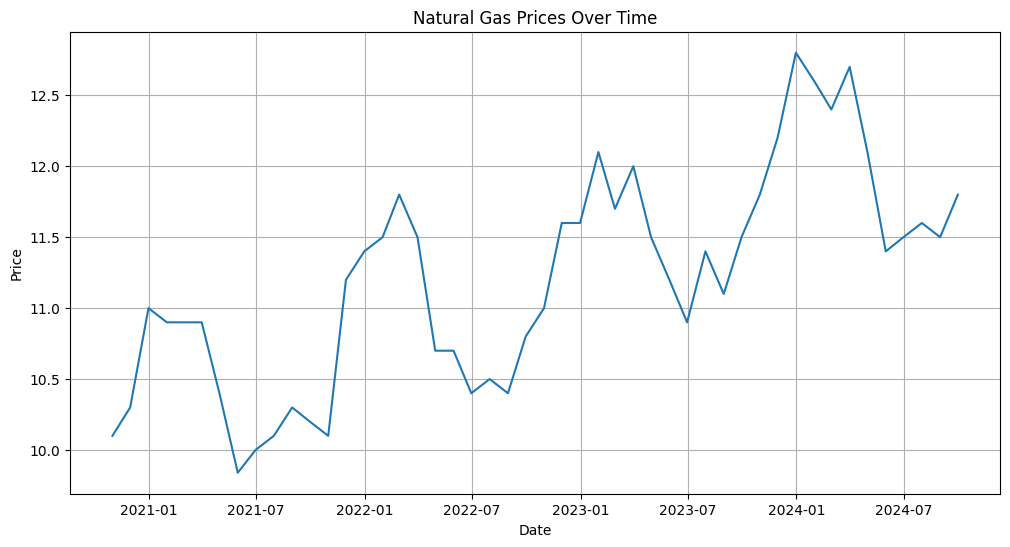

<ipython-input-4-5b639bdc85fa>:95: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=12, freq='M')
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
<ipython-input-4-5b639bdc85fa>:91: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be trea

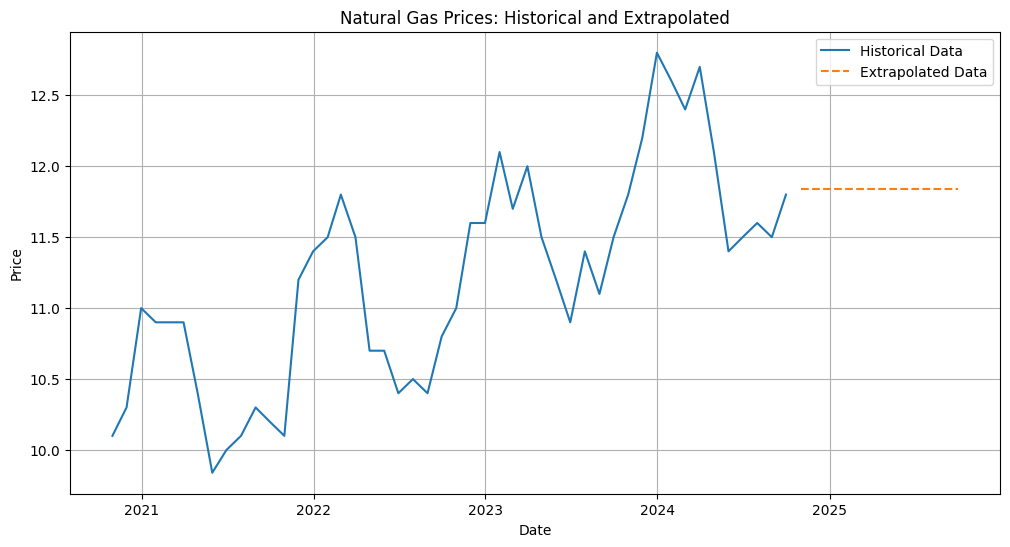

Estimated price on 2023-06-15: 10.90
Estimated price on 2024-12-31: 11.84


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
<ipython-input-4-5b639bdc85fa>:91: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return forecast[days_diff]
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No

Estimated price on 2025-06-30: 11.84


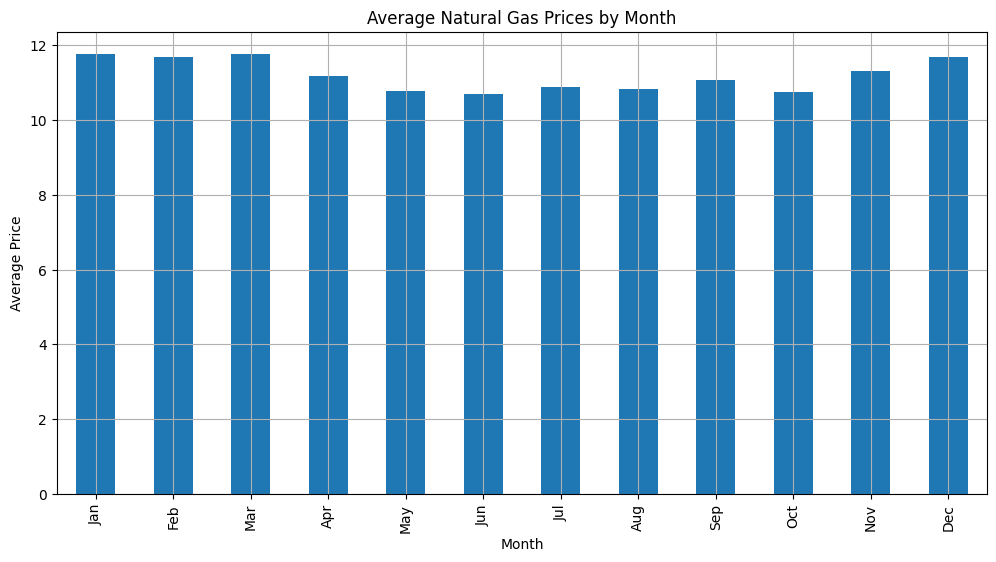

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta
import io

# The data as a string (replace this with file reading if you have an actual file)
data_string = """Dates,Prices
10/31/20,1.01E+01
11/30/20,1.03E+01
12/31/20,1.10E+01
1/31/21,1.09E+01
2/28/21,1.09E+01
3/31/21,1.09E+01
4/30/21,1.04E+01
5/31/21,9.84E+00
6/30/21,1.00E+01
7/31/21,1.01E+01
8/31/21,1.03E+01
9/30/21,1.02E+01
10/31/21,1.01E+01
11/30/21,1.12E+01
12/31/21,1.14E+01
1/31/22,1.15E+01
2/28/22,1.18E+01
3/31/22,1.15E+01
4/30/22,1.07E+01
5/31/22,1.07E+01
6/30/22,1.04E+01
7/31/22,1.05E+01
8/31/22,1.04E+01
9/30/22,1.08E+01
10/31/22,1.10E+01
11/30/22,1.16E+01
12/31/22,1.16E+01
1/31/23,1.21E+01
2/28/23,1.17E+01
3/31/23,1.20E+01
4/30/23,1.15E+01
5/31/23,1.12E+01
6/30/23,1.09E+01
7/31/23,1.14E+01
8/31/23,1.11E+01
9/30/23,1.15E+01
10/31/23,1.18E+01
11/30/23,1.22E+01
12/31/23,1.28E+01
1/31/24,1.26E+01
2/29/24,1.24E+01
3/31/24,1.27E+01
4/30/24,1.21E+01
5/31/24,1.14E+01
6/30/24,1.15E+01
7/31/24,1.16E+01
8/31/24,1.15E+01
9/30/24,1.18E+01"""

# Load and preprocess the data
data = pd.read_csv(io.StringIO(data_string))
data['Dates'] = pd.to_datetime(data['Dates'], format='%m/%d/%y')
data['Prices'] = pd.to_numeric(data['Prices'], errors='coerce')
data.set_index('Dates', inplace=True)

# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Prices'])
plt.title('Natural Gas Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Function to estimate price for a given date
def estimate_price(date):
    if isinstance(date, str):
        date = pd.to_datetime(date)

    if date < data.index.min() or date > data.index.max() + pd.Timedelta(days=365):
        return None

    if date <= data.index.max():
        return data.loc[date:].iloc[0]['Prices']

    # For future dates, use ARIMA forecast
    model = ARIMA(data['Prices'], order=(1,1,1))
    results = model.fit()
    forecast = results.forecast(steps=365)
    forecast_date = data.index.max() + pd.Timedelta(days=1)
    days_diff = (date - forecast_date).days
    return forecast[days_diff]

# Extrapolate data for one more year
last_date = data.index.max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=12, freq='M')
future_prices = [estimate_price(date) for date in future_dates]

# Create a DataFrame with the extrapolated data
future_data = pd.DataFrame({'Dates': future_dates, 'Prices': future_prices})
future_data.set_index('Dates', inplace=True)

# Combine historical and future data
combined_data = pd.concat([data, future_data])

# Visualize the combined data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Prices'], label='Historical Data')
plt.plot(future_data.index, future_data['Prices'], label='Extrapolated Data', linestyle='--')
plt.title('Natural Gas Prices: Historical and Extrapolated')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Example usage
print(f"Estimated price on 2023-06-15: {estimate_price('2023-06-15'):.2f}")
print(f"Estimated price on 2024-12-31: {estimate_price('2024-12-31'):.2f}")
print(f"Estimated price on 2025-06-30: {estimate_price('2025-06-30'):.2f}")

# Analyze seasonal patterns
data['Month'] = data.index.month
monthly_avg = data.groupby('Month')['Prices'].mean()

plt.figure(figsize=(12, 6))
monthly_avg.plot(kind='bar')
plt.title('Average Natural Gas Prices by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()